# **Support Vector Regression**

### **Importing All Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

### **Data Framing**

In [2]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe(), "\n")
print(df.info())

data shape: (237, 4)

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64 

           Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
count  237.000000  237.000000       237.000000           237.000000
mean     1.434599    1.535865      3633.991561          1282.873418
std      0.496753    0.499768       365.261422           120.340446
min      1.000000    1.000000      2720.000000           955.000000
25%      1.000000    1.000000      3389.000000          1207.000000
50%      1.000000    2.000000      3614.000000          1280.000000
75%      2.000000    2.000000      3876.000000          1350.000000
max      2.000000    2.000000      4747.000000          1635.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 

### **KDE Plotting before feature scaling to visualize**

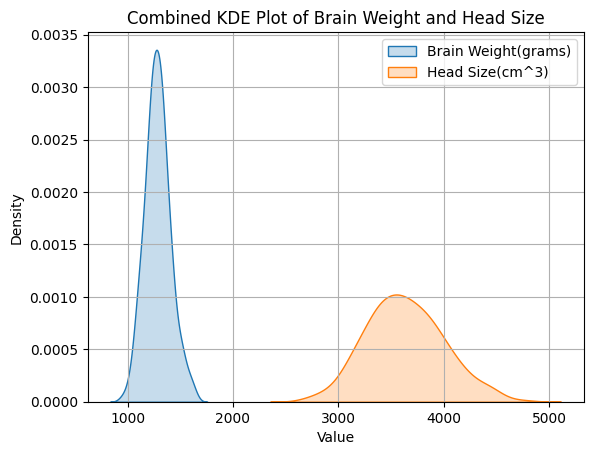

In [4]:
# KDE plot for Brain Weight and Head Size
sns.kdeplot(data=df, x='Brain Weight(grams)', label='Brain Weight(grams)', fill=True)
sns.kdeplot(data=df, x='Head Size(cm^3)', label='Head Size(cm^3)', fill=True)

# Add labels and title
plt.title('Combined KDE Plot of Brain Weight and Head Size')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### **Extract relevant columns**

In [5]:
X = df[['Head Size(cm^3)']].values
y = df['Brain Weight(grams)'].values

### **Visualizing the Dataset**

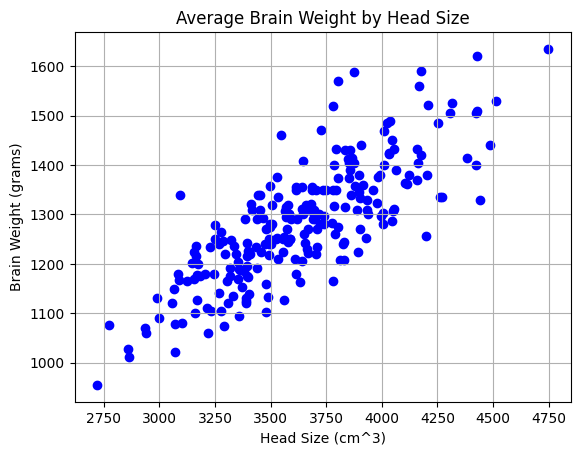

In [6]:
plt.scatter(X, y, color='blue')
plt.title('Average Brain Weight by Head Size')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.grid()  
plt.show()

### **Splitting the dataset**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Feature Scaling**

Standard Scaler

In [8]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

### **KDE Plotting after feature scaling (standardization) to visualize**

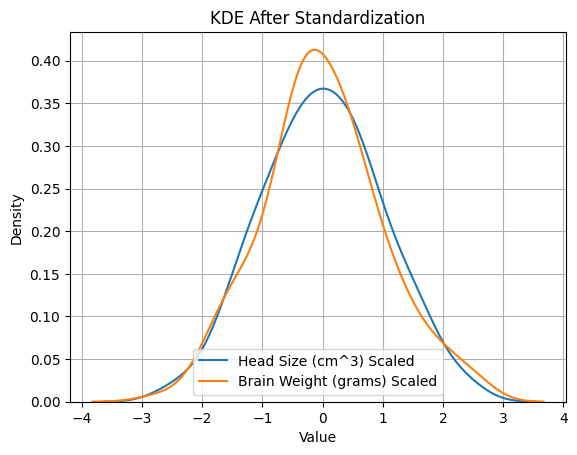

In [9]:
sns.kdeplot(data=X_train_scaled, label='Head Size (cm^3) Scaled')
sns.kdeplot(data=y_train_scaled, label='Brain Weight (grams) Scaled')

plt.title('KDE After Standardization')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### **Training the Model**

In [10]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

### **Predicting using the SVR model**

In [11]:
y_pred_scaled = svr_linear.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_pred

array([1245.11117527, 1339.05217874, 1265.2947861 , 1218.19969418,
       1316.37676411, 1156.90132056, 1365.46529908, 1086.88163363,
       1263.05216267, 1215.70789037, 1371.19644783, 1196.02264031,
       1316.87512487, 1291.95708682, 1268.78331143, 1234.89477967,
       1556.08829019, 1293.20298872, 1197.76690297, 1475.60302728,
       1220.94067836, 1220.19313722, 1252.83576707, 1178.82919405,
       1231.15707396, 1187.55050737, 1263.05216267, 1477.09810956,
       1218.94723532, 1475.3538469 , 1382.65874533, 1280.74396969,
       1208.48165933, 1144.44230154, 1477.09810956, 1336.56037493,
       1233.15051701, 1137.46525088, 1216.20625113, 1384.15382762,
       1182.81608014, 1378.42267887, 1244.61281451, 1344.78332749,
       1278.25216589, 1209.97674162, 1203.99641249, 1151.66853257])

In [12]:
# Predicting over the entire range to get a smooth line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler_X.transform(X_range)
y_range_scaled = svr_linear.predict(X_range_scaled)
y_range = scaler_y.inverse_transform(y_range_scaled.reshape(-1, 1)).ravel()

C:\Users\Noor\AppData\Local\Temp\ipykernel_2084\4117356359.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


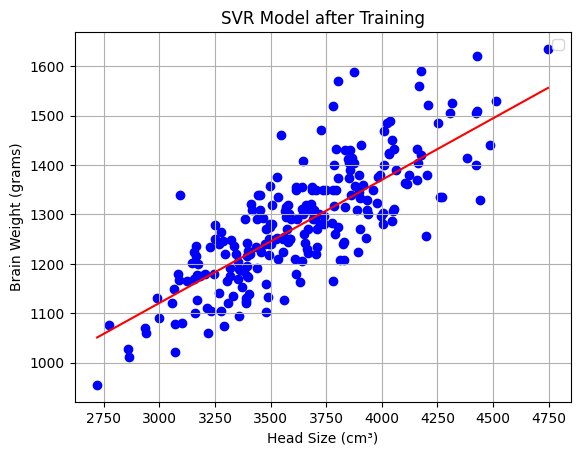

In [15]:
# Plotting after training
plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range, color='red')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('SVR Model after Training')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4765.480033193452
R-squared: 0.7092154519643686


1. The model exhibits moderate predictive accuracy, with a Mean Squared Error of 4765.48.
2. It explains approximately 71% of the variance in the dependent variable, demonstrating a reasonably good fit to the data.